In [ ]:
# Symbolic calculation for Advanced Mechanics 1st HW
# Made by: Barnabás Piri
# Date: 2023. 05. 03

In [88]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True
sp.init_printing(use_latex='mathjax')

###### 1. Calculate the reaction forces acting on the blades from the hub

<center><img src="mech_model.png" width=500/></center>

In [48]:
ρ_num = 7800 # kg/m^3
r_num = 150 / 1000 # m
l_num = 125 / 1000 # m
α_num = 18 * np.pi/180 # rad
b_num = 6 / 1000 # m
n_num = 2800 * 1/60 # 1/s
a_c_num = 0 # m/s^2
ε_z_num = -30000 # rad/s^2

In [49]:
ω_num = 2*np.pi*n_num # rad/s

In [50]:
ρ, r, l, α, b, ε_z, x, n, ω = sp.symbols('ρ, r, l, α, b, ε_z, x, n, ω')

In [51]:
data = [(ρ, ρ_num), (r, r_num), (l, l_num), (α, α_num), (b, b_num), (n, n_num), (ε_z, ε_z_num), (ω, ω_num)]

Area of a blade at cross section $x$:

In [52]:
w = (r+x)*sp.tan(α)

In [53]:
A = b*w
A

b⋅(r + x)⋅tan(α)

###### 1. step: rigid body dynamics

The angular accelaration is already given, so this step is automatically completed.

###### 2. step: kinematics

In [54]:
a = sp.Matrix([[-ω**2*(r+x)], [ε_z*(r+x)], [0]])
a

⎡  2        ⎤
⎢-ω ⋅(r + x)⎥
⎢           ⎥
⎢ε_z⋅(r + x)⎥
⎢           ⎥
⎣     0     ⎦

###### 3. step: D'Alambert principle

In [55]:
p = -ρ*A*a
p

⎡      2        2        ⎤
⎢ b⋅ρ⋅ω ⋅(r + x) ⋅tan(α) ⎥
⎢                        ⎥
⎢                2       ⎥
⎢-b⋅ε_z⋅ρ⋅(r + x) ⋅tan(α)⎥
⎢                        ⎥
⎣           0            ⎦

In [56]:
p_x = p[0]
p_x

     2        2       
b⋅ρ⋅ω ⋅(r + x) ⋅tan(α)

In [57]:
p_y = p[1]
p_y

                2       
-b⋅ε_z⋅ρ⋅(r + x) ⋅tan(α)

###### 4. step: elastic body

In [58]:
O_x, O_y, M_O = sp.symbols('O_x, O_y, M_O')

In [59]:
eq1 = sp.Eq( O_x + sp.integrate(p_x, (x,0,l)), 0 )
eq1

        3    2                                                     
     b⋅l ⋅ρ⋅ω ⋅tan(α)      2      2               2    2           
Oₓ + ──────────────── + b⋅l ⋅r⋅ρ⋅ω ⋅tan(α) + b⋅l⋅r ⋅ρ⋅ω ⋅tan(α) = 0
            3                                                      

In [60]:
eq2 = sp.Eq( O_y + sp.integrate(p_y, (x,0,l)), 0 )
eq2

         3                                                             
      b⋅l ⋅ε_z⋅ρ⋅tan(α)      2                       2                 
O_y - ───────────────── - b⋅l ⋅r⋅ε_z⋅ρ⋅tan(α) - b⋅l⋅r ⋅ε_z⋅ρ⋅tan(α) = 0
              3                                                        

In [61]:
O_x = sp.solve(eq1, O_x)
O_x = O_x[0]

In [62]:
O_y = sp.solve(eq2, O_y)
O_y = O_y[0]

In [63]:
O_x_num = O_x.subs(data)
O_x_num

-7592.22078252784

In [64]:
O_y_num = O_y.subs(data)
O_y_num

-2649.21243575399

In [65]:
eq3 = sp.Eq( M_O + sp.integrate(p_y*x, (x,0,l)), 0 )
eq3

         4                     3                     2  2                 
      b⋅l ⋅ε_z⋅ρ⋅tan(α)   2⋅b⋅l ⋅r⋅ε_z⋅ρ⋅tan(α)   b⋅l ⋅r ⋅ε_z⋅ρ⋅tan(α)    
M_O - ───────────────── - ───────────────────── - ──────────────────── = 0
              4                     3                      2              

In [66]:
M_O = sp.solve(eq3, M_O)
M_O = M_O[0]

In [67]:
M_O_num = M_O.subs(data)
M_O_num

-197.131698904900

Stress resultants:

In [68]:
N = -O_x - sp.integrate(p_x, (x,0,x))
N.simplify()

     2 ⎛  ⎛ 2              2⎞      2          2    3⎞       
b⋅ρ⋅ω ⋅⎝l⋅⎝l  + 3⋅l⋅r + 3⋅r ⎠ - 3⋅r ⋅x - 3⋅r⋅x  - x ⎠⋅tan(α)
────────────────────────────────────────────────────────────
                             3                              

In [69]:
N_num = sp.lambdify(x, N.subs(data))

In [70]:
V = O_y + sp.integrate(p_y, (x,0,x))
V.simplify()

        ⎛  ⎛ 2              2⎞      2          2    3⎞       
b⋅ε_z⋅ρ⋅⎝l⋅⎝l  + 3⋅l⋅r + 3⋅r ⎠ - 3⋅r ⋅x - 3⋅r⋅x  - x ⎠⋅tan(α)
─────────────────────────────────────────────────────────────
                              3                              

In [71]:
V_num = sp.lambdify(x, V.subs(data))

In [72]:
M_b = M_O - sp.integrate(V, (x,0,x))
M_b.simplify()

        ⎛ 2 ⎛   2              2⎞         ⎛ 2              2⎞      2  2       
b⋅ε_z⋅ρ⋅⎝l ⋅⎝3⋅l  + 8⋅l⋅r + 6⋅r ⎠ - 4⋅l⋅x⋅⎝l  + 3⋅l⋅r + 3⋅r ⎠ + 6⋅r ⋅x  + 4⋅r⋅
──────────────────────────────────────────────────────────────────────────────
                                              12                              

 3    4⎞       
x  + x ⎠⋅tan(α)
───────────────
               

In [73]:
M_b_num = sp.lambdify(x, M_b.subs(data))

Plotting the functions:

In [74]:
N_x_data = np.linspace(0,l_num)
N_y_data = N_num(N_x_data)

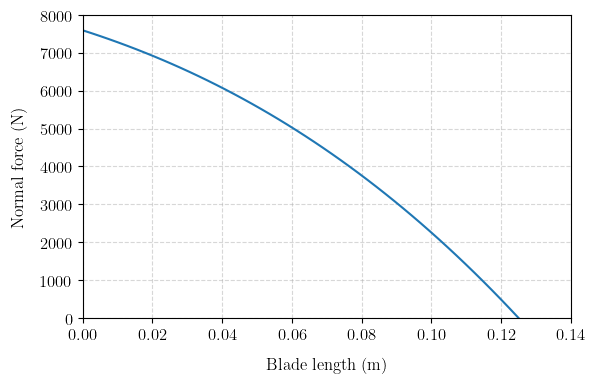

In [75]:
plt.figure(figsize=(16/2.54, 10/2.54))
plt.plot(N_x_data,N_y_data)
plt.grid(True, alpha=0.5, linestyle='--')
plt.xlim(0,0.14);
plt.ylim(0,8000);
plt.xlabel('$\\mathrm{Blade~length ~ (m)}$', labelpad=10, size=12);
plt.ylabel('$\\mathrm{Normal~force ~ (N)}$', labelpad=10, size=12);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.savefig("normal_force.pdf",bbox_inches='tight',pad_inches=2/25.4)

In [76]:
V_x_data = np.linspace(0,l_num)
V_y_data = V_num(V_x_data)

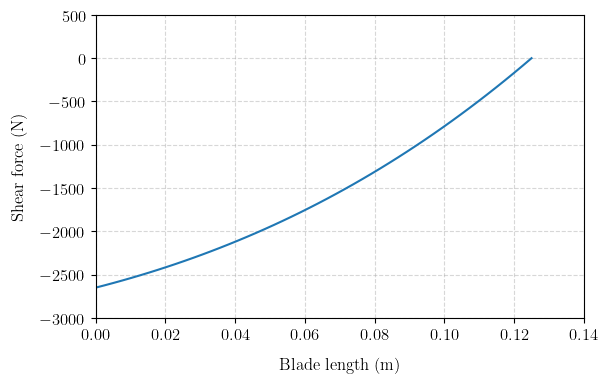

In [77]:
plt.figure(figsize=(16/2.54, 10/2.54))
plt.plot(V_x_data,V_y_data)
plt.grid(True, alpha=0.5, linestyle='--')
plt.xlim(0,0.14);
plt.ylim(-3000,500);
plt.xlabel('$\\mathrm{Blade~length ~ (m)}$', labelpad=10, size=12);
plt.ylabel('$\\mathrm{Shear~force ~ (N)}$', labelpad=10, size=12);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.savefig("shear_force.pdf",bbox_inches='tight',pad_inches=2/25.4)

In [78]:
M_b_x_data = np.linspace(0,l_num)
M_b_y_data = M_b_num(M_b_x_data)

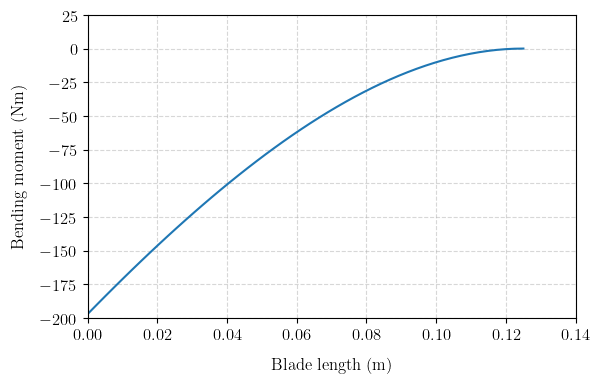

In [79]:
plt.figure(figsize=(16/2.54, 10/2.54))
plt.plot(M_b_x_data,M_b_y_data)
plt.grid(True, alpha=0.5, linestyle='--')
plt.xlim(0,0.14);
plt.ylim(-200,25);
plt.xlabel('$\\mathrm{Blade~length ~ (m)}$', labelpad=10, size=12);
plt.ylabel('$\\mathrm{Bending~moment ~ (Nm)}$', labelpad=10, size=12);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.savefig("bending_moment.pdf",bbox_inches='tight',pad_inches=2/25.4)

Maximum of normal force:

In [80]:
if abs(max(N_y_data)) > abs(min(N_y_data)):
    N_max = max(N_y_data)
    
else:
    N_max = min(N_y_data)
    
N_max = N_max.round(4)

print(f'The maximum value of the normal force is: N_max = {N_max} [N]')

The maximum value of the normal force is: N_max = 7592.2208 [N]


Maximum of bending moment:

In [81]:
if abs(max(M_b_y_data)) > abs(min(M_b_y_data)):
    M_b_max = max(M_b_y_data)
    
else:
    M_b_max = min(M_b_y_data)
    
M_b_max = M_b_max.round(4)

print(f'The maximum value of the bending moment is: M_b_max = {M_b_max} [Nm]')

The maximum value of the bending moment is: M_b_max = -197.1317 [Nm]


Maximum of shear force:

In [82]:
if abs(max(V_y_data)) > abs(min(V_y_data)):
    V_max = max(V_y_data)
    
else:
    V_max = min(V_y_data)
    
V_max = V_max.round(4)

print(f'The maximum value of the shear force is: V_max = {V_max} [N]')

The maximum value of the shear force is: V_max = -2649.2124 [N]


Normal stress:

In [83]:
σ_x_x_data = np.linspace(0,l_num)

In [84]:
w_num = sp.lambdify(x, w.subs(data))

In [85]:
σ_x_y_data = M_b_num(σ_x_x_data) / (w_num(σ_x_x_data)**3*b_num / 12 )*(-w_num(σ_x_x_data)/2) + N_num(σ_x_x_data) / (w_num(σ_x_x_data)*b_num)
σ_x_y_data;

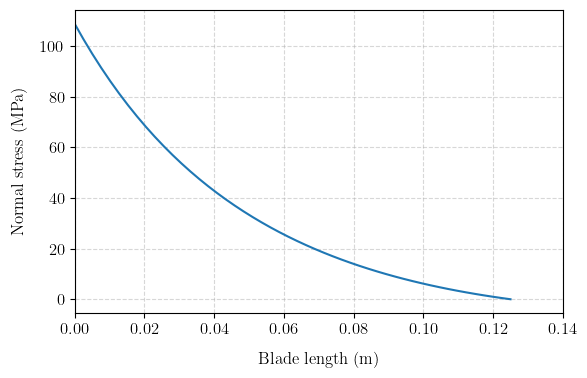

In [86]:
plt.figure(figsize=(16/2.54, 10/2.54))
plt.plot(σ_x_x_data,σ_x_y_data*10**(-6))
plt.grid(True, alpha=0.5, linestyle='--')
plt.xlim(0,0.14);
#plt.ylim(-3000,500);
plt.xlabel('$\\mathrm{Blade~length ~ (m)}$', labelpad=10, size=12);
plt.ylabel('$\\mathrm{Normal~stress ~ (MPa)}$', labelpad=10, size=12);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.savefig("normal_stress.pdf",bbox_inches='tight',pad_inches=2/25.4)

Maximum of normal stress:

In [87]:
if abs(max(σ_x_y_data)) > abs(min(σ_x_y_data)):
    σ_x_max = max(σ_x_y_data)
    
else:
    σ_x_max = min(σ_x_y_data)

σ_x_max = (σ_x_max/10**6).round(4)

print(f'The maximum value of normal stress is: σ_x_max = {σ_x_max} [MPa]')

The maximum value of normal stress is: σ_x_max = 108.952 [MPa]
